In [2]:
from os import *
import os
from os.path import join
from shutil import copyfile

In [3]:
rootdir = "Raw_data/"
target_path_MRI = "ExtractedDicom/T1_MRI"

In [4]:
count2 = 0
for dirs in os.listdir(rootdir):
    path_sub = join(rootdir,dirs)
    for subDir in os.listdir(path_sub):
        final_path = join(path_sub,subDir)
        if "T1" in final_path:
            print(final_path)
            target_path = join(target_path_MRI,"%s.mha" % count2)
            path_MRI = join(target_path_MRI,"%s.mha" % count2)
            copyfile(final_path,path_MRI )
            count2 = count2+1

Raw_data/brats_2013_pat0003_1/VSD.Brain.XX.O.MR_T1c.54526.mha
Raw_data/brats_2013_pat0003_1/VSD.Brain.XX.O.MR_T1.54525.mha
Raw_data/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_T1c.54520.mha
Raw_data/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_T1.54519.mha
Raw_data/brats_2013_pat0004_1/VSD.Brain.XX.O.MR_T1c.54532.mha
Raw_data/brats_2013_pat0004_1/VSD.Brain.XX.O.MR_T1.54531.mha
Raw_data/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1c.54514.mha
Raw_data/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1.54513.mha


In [5]:
import os
from os.path import join
import numpy as np
import pandas as pd
import SimpleITK
import matplotlib.pyplot as plt
import time
from shutil import copyfile
from progressbar import ProgressBar
pbar = ProgressBar()

In [9]:
rootdir = "ExtractedDicom/T1_MRI/"
T1_dir = "Images/T1_MRI/"

In [10]:
def sitk_show(img, filename,count, margin=0.0, dpi=40):
    nda = SimpleITK.GetArrayFromImage(img)
#     nda=numpy.transpose(nda)
#     print(nda.shape)
    #spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    #extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    extent = (0, nda.shape[1], nda.shape[0], 0)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    name = filename + str(count)+'.png'
    fdest = join(T1_dir, name)
    print(fdest)
    plt.savefig(fdest)
    #plt.show()
    plt.close()
    plt.cla()
    plt.clf()
    del nda

6.mha
ExtractedDicom/T1_MRI/6.mha
Images/T1_MRI/6.mha60.png
Images/T1_MRI/6.mha61.png
Images/T1_MRI/6.mha62.png
Images/T1_MRI/6.mha63.png
Images/T1_MRI/6.mha64.png
Images/T1_MRI/6.mha65.png
Images/T1_MRI/6.mha66.png
Images/T1_MRI/6.mha67.png
Images/T1_MRI/6.mha68.png
Images/T1_MRI/6.mha69.png
Images/T1_MRI/6.mha70.png
Images/T1_MRI/6.mha71.png
Images/T1_MRI/6.mha72.png
Images/T1_MRI/6.mha73.png
Images/T1_MRI/6.mha74.png
Images/T1_MRI/6.mha75.png
Images/T1_MRI/6.mha76.png
Images/T1_MRI/6.mha77.png
Images/T1_MRI/6.mha78.png
Images/T1_MRI/6.mha79.png
Images/T1_MRI/6.mha80.png
Images/T1_MRI/6.mha81.png
Images/T1_MRI/6.mha82.png
Images/T1_MRI/6.mha83.png
Images/T1_MRI/6.mha84.png
Images/T1_MRI/6.mha85.png
Images/T1_MRI/6.mha86.png
Images/T1_MRI/6.mha87.png
Images/T1_MRI/6.mha88.png
Images/T1_MRI/6.mha89.png
4.mha
ExtractedDicom/T1_MRI/4.mha
Images/T1_MRI/4.mha60.png
Images/T1_MRI/4.mha61.png
Images/T1_MRI/4.mha62.png
Images/T1_MRI/4.mha63.png
Images/T1_MRI/4.mha64.png
Images/T1_MRI/4.mha65.

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

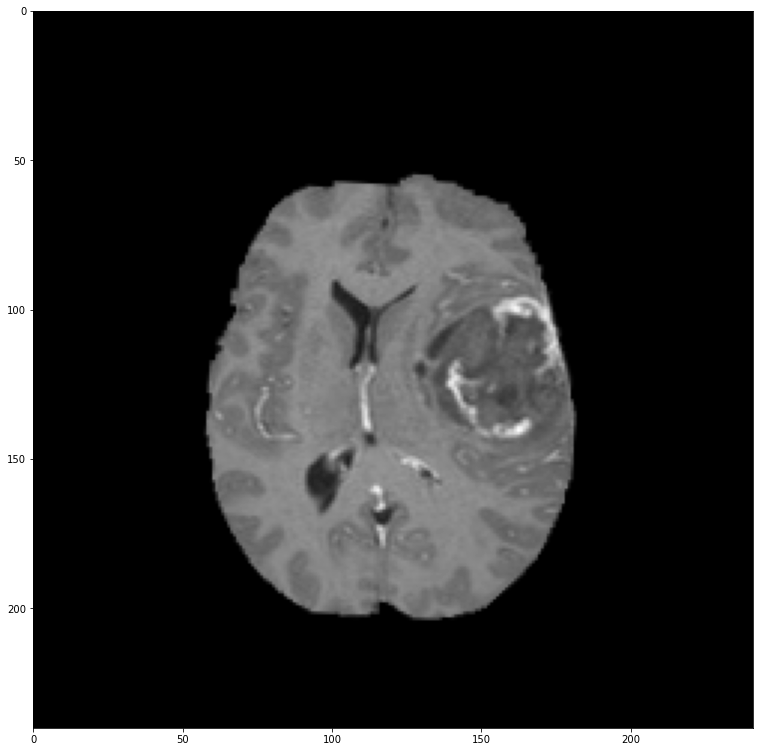

In [11]:
for file in os.listdir(rootdir):
    print(file)
    full_path = join(rootdir, file)
    print(full_path)
    imgT2Original = SimpleITK.ReadImage(full_path)
    for i in range(60,90):
        sitk_show(SimpleITK.Tile(imgT2Original[:,:,i],(2,1,0)),file,i,)
        #pass
    time.sleep(2)
#    del imgT2Original
#    del full_path